# Week 1: Exploring the data + a first look at the halo mass function

### Imports

Several Python modules are imported in Cell 2; when first running an interactive notebook, you'll need to `pip install` these modules by uncommenting and running Cell 1.

In [96]:
# import sys
# !{sys.executable} -m pip install https://bitbucket.org/yymao/helpers/get/master.zip

In [97]:
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
import matplotlib as mpl


%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
# plt.rc("text", usetex=True)
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_blues_complement[0]
sim_colors['wdm_4'] = custom_blues_complement[1]
sim_colors['wdm_5'] = custom_blues_complement[2]
sim_colors['wdm_6'] = custom_blues_complement[3]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['wdm_10'] = custom_blues_complement[5]

## Load Data

The `sim_data` dictionary is structured as follows:

    `sim_data` = {
                    `Halo004`: {
                                `model_1`: [
                                            host_main_branch,
                                            isolated_halo_population,
                                            subhalo_population
                                         ]
                                         
                                `model_2`: [...]
                                
                                ... 
                                
                                `model_N`: [...]
                                         
                               }
                           
                    `Halo113`: { ... }

                    `Halo023`: { ... }

                 }
                 
Here, each combination of `HaloXYZ` and `model_i` is a different simulation. The `Halo`s are different Milky Way-like systems, and the `model`s are different dark matter models. All possible combinations are listed [here](https://docs.google.com/spreadsheets/d/1HDdv2Fn2YlU5B_izwaDn4Cg-x0vqAXU1sYc8i4Z_SWo/edit?usp=sharing).

Each simulation's data contains:

-- `host_main_branch`: The "main branch" of the Milky Way host halo in each simulation. This is an array that stores the properties of the host halo, starting from $z=0$ (today) as the 0th entry and going back to progressively earlier times. [This link](https://www.cosmosim.org/cms/data/data-structure/merger-trees/) explains how merger trees are structured, and [this page](https://bitbucket.org/pbehroozi/consistent-trees/src/main/) describes more about how the data is structured, and how fields are defined. Don't worry about the details for now!

-- `isolated_halo_population`: An array of all isolated halos, and their properties, at $z=0$. "Isolated" means that a halo is not within the virial radius of any larger halo.

-- `subhalo_population`: An array of all subhalos of the main Milky Way host, at $z=0$.

In [98]:
with open("sim_data.bin", "rb") as f:
    sim_data = pickle.load(f, encoding='latin1')

## Exploring the data

Let's plot a few properties of the host main branch, isolated halo population, and subhalo population to get a feel for the data. For now, we'll focus on a single realization (`Halo004`) and model (`cdm`), i.e. the standard [Cold dark matter model](https://en.wikipedia.org/wiki/Cold_dark_matter).

### Host halo mass accretion history

Let's visualize how the host halo built up its mass over time.

In [99]:
host_main_branch = sim_data['Halo004']['cdm'][0] # halo, model, host main branch

#Print the first 10 entries
print(hmb_cdm[0:10])

#Print the name of each field
print(host_main_branch.dtype) # look more into what these datatypes are

[(1.     , 7208101, 29, -1, 7.225e+11, 184.336, 17.119, 64.76799, 62.80204, 64.83894, 163.98)
 (0.98733, 7179446, 24, -1, 7.094e+11, 184.217, 20.226, 64.75042, 62.79382, 64.82188, 152.71)
 (0.97483, 7150203, 23, -1, 6.968e+11, 184.096, 21.123, 64.73286, 62.78687, 64.80569, 149.97)
 (0.96248, 7120603, 23, -1, 6.804e+11, 183.598, 21.98 , 64.71503, 62.78196, 64.78942, 150.3 )
 (0.95029, 7090425, 20, -1, 6.612e+11, 182.797, 20.788, 64.69801, 62.7759 , 64.77243, 149.8 )
 (0.93825, 7060540, 22, -1, 6.188e+11, 179.7  , 17.653, 64.68105, 62.76966, 64.75536, 149.7 )
 (0.92637, 7030562, 18, -1, 5.575e+11, 174.414, 15.466, 64.66423, 62.76276, 64.73845, 150.68)
 (0.91463, 7000464, 19, -1, 5.346e+11, 172.828, 14.959, 64.64739, 62.75506, 64.72208, 149.61)
 (0.90305, 6970386, 18, -1, 5.211e+11, 172.182, 15.183, 64.63033, 62.74763, 64.70621, 146.1 )
 (0.89161, 6940136, 18, -1, 5.140e+11, 172.188, 16.134, 64.61298, 62.74122, 64.69099, 144.7 )]
[('scale', '<f4'), ('id', '<i8'), ('num_prog', '<i8'), ('up

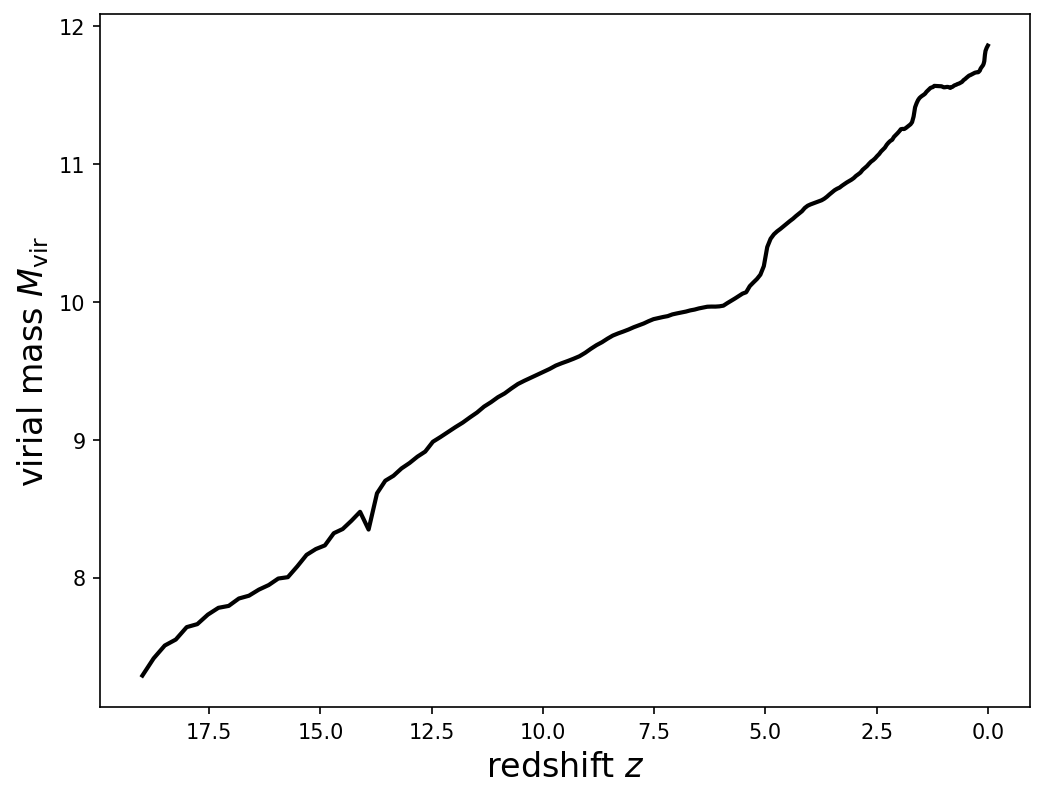

In [100]:
plt.figure(figsize=(8,6))

redshift = 1./host_main_branch['scale'] - 1.
mass_accretion_history = np.log10(host_main_branch['mvir']) # virial mass

plt.plot(redshift,mass_accretion_history,lw=2,c=sim_colors['cdm']) 

plt.xlabel(r'$\mathrm{redshift\ } z$',fontsize=16)
plt.ylabel(r'$\mathrm{virial\ mass\ } M_{\mathrm{vir}}$',fontsize=16)

plt.gca().invert_xaxis()
plt.show()

### Subhalo population

Next, let's visualize all of the subhalos in the host at $z=0$.

In [101]:
subhalos = sim_data['Halo004']['cdm'][2] # halo, model, subhalo population

#Print the first 2 entries
print(subhalos[0:2])

#Print the name of each field
print(subhalos.dtype)

[(1., 7208901, 0., -1, 4, 7208101, 7208101, -1, 0, 1.056e+11, 1.056e+11, 97.108, 7.951, 96.86, 1, 0.64828, 84.22, 64.77139, 62.8354 , 64.86526,  55.39,  -98.75,  -83.4, 3.390e+10, 1.121e+10, 7.420e+10, 0.07096, 322076, 322076, 7208901, 10181, 235., -1, 386363, 322271, 4.37909, 7208101, 8.8325 , 1.1975e+11, 1.1027e+11, 9.6867e+10, 7.4368e+10, 3.8393e+10, 5.10269, 18.44, 0.08299, 0.78175, 0.65477, 2.10344,  2.70516,  0.80949, 0.74048, 0.70133,  0.6534 , 2.38831, 1.3676 , 0.7373, 1.301e+11, 5.239e+10, 32.072, 30.4556 , 1.142e+11, 1.193e+11, 82.  , 88.66, 0.4654 , -77.13  , -77.13  ,  4.767,  5.21 , 1.906, -1.822e-11,  8.970e-12, 0.98733, 0.92637, 0.92637, 1.142e+11, 82.  , 84.85, 1.70668,  0.01779, -1., 7208901)
 (1., 7208235, 0., -1, 2, 7208901, 7208101, -1, 0, 1.135e+10, 1.135e+10, 46.161, 2.353, 45.5 , 1, 0.88031, 45.53, 64.72385, 62.80537, 64.87217, 164.94, -124.61, -116.4, 5.475e+08, 2.948e+08, 2.056e+08, 0.03055, 869915, 869915, 7208235,  9515, 235., -1, 885845, 870150, 3.6475 , 720

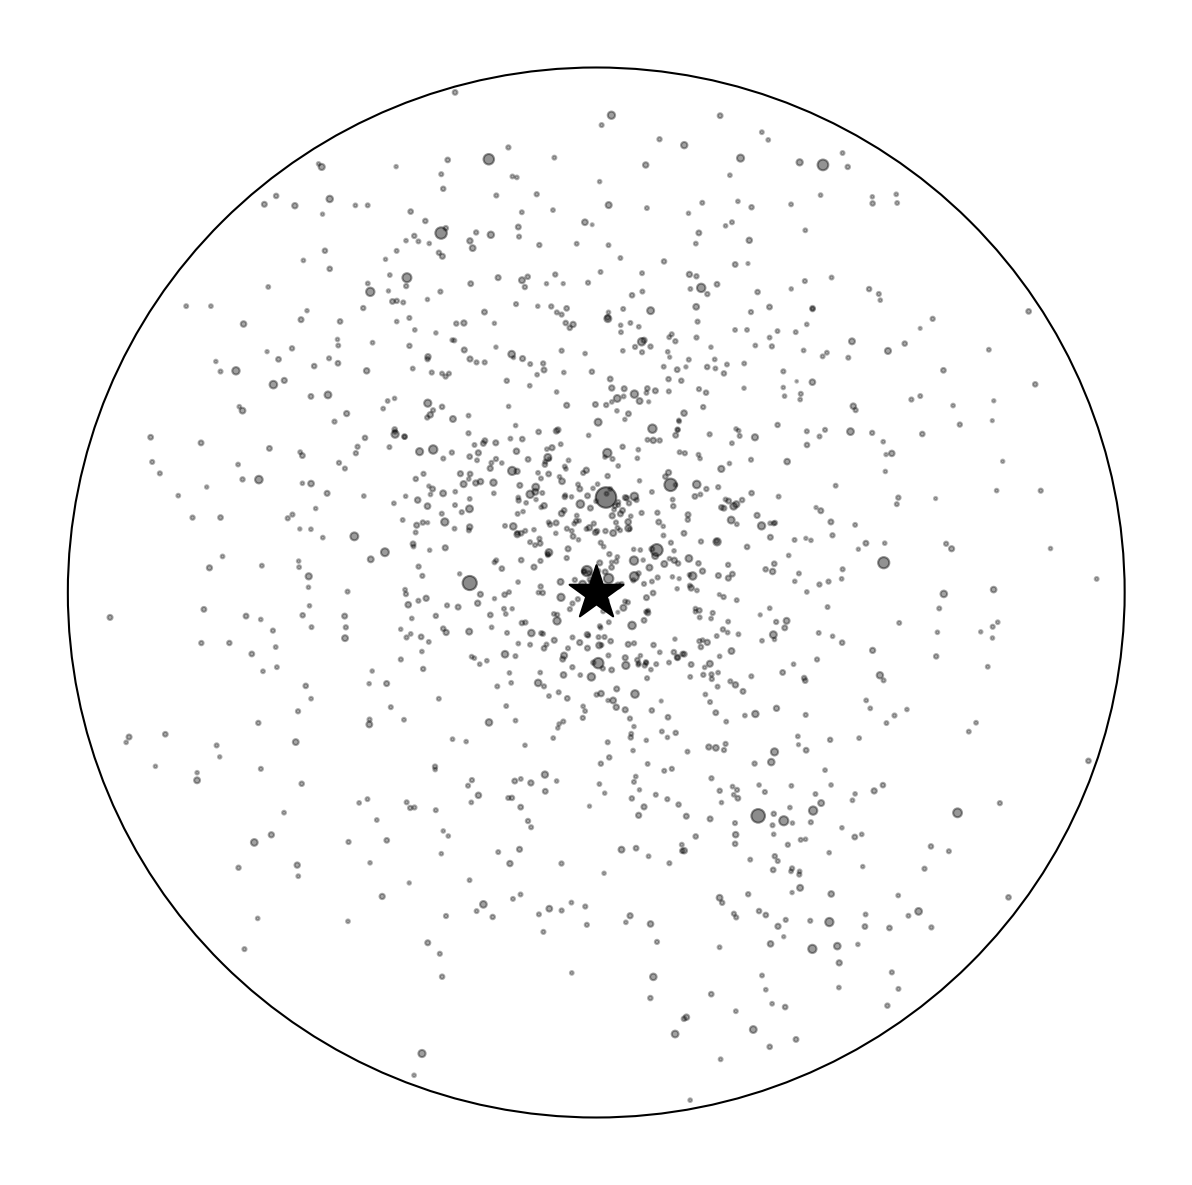

In [102]:
plt.figure(figsize=(10,10))

plt.scatter(host_main_branch['x'][0],host_main_branch['y'][0],s=4*host_main_branch['rvir'][0],marker='*',zorder=999,
           c=sim_colors['cdm'])
circle = plt.Circle((host_main_branch['x'][0],host_main_branch['y'][0]), host_main_branch['rvir'][0]/1000.,
                   facecolor='none',edgecolor=sim_colors['cdm'])#, color='blue')
plt.gca().add_patch(circle)

plt.scatter(subhalos['x'],subhalos['y'],s=subhalos['Rvir'],
            alpha=0.5*np.log10(subhalos['Mvir'])/np.max(np.log10(subhalos['Mvir'])),c=sim_colors['cdm'],zorder=998)

plt.axis('off')
plt.show()

### Halo mass function

Finally, let's plot the halo mass function: the number of halos as a function of halo mass. In this case, we'll use *isolated halos* at $z=0$, and we'll measure halo mass using `Mpeak`, which is the largest value of `Mvir` each halo ever attains, throughout its main branch history. In addition, we'll plot the *cumulative* halo mass function, i.e., the total number of halos as a function of mass (later, we'll be interested in the *differential* halo mass function, i.e., the number of halos in bins of mass).

There are two important notes:

1. We only use within 3 Mpc from the center of the Milky Way host halo. This is because the central regions of zoom-in simulations are resolved the best, so halos at larger distances may not be accurately resolved.

2. We only use halos with mass above $1.2\times 10^8~M_{\mathrm{\odot}}$, corresponding to 300 simulation particles, since halos with fewer particles are not well resolved.

In [103]:
halos = sim_data['Halo004']['cdm'][1]

#Print the first 2 entries
print(halos[0:2])

#Print the name of each field
print(halos.dtype)

[(1., 7208101, 0., -1, 29, -1, -1, -1, 0, 7.22500e+11, 7.225e+11, 184.336, 17.119, 173.14, 1, 0.37953, 163.98, 64.76799, 62.80204, 64.83894, 135.9, 61.16, 128.21,  4.125e+11, 2.752e+10, 7.358e+11, 0.03323,      0,      0, 7208101, 27169, 235., -1, 322075,    235, 0.     ,      -1, 15.0659 , 7.2402e+11, 7.6975e+11, 6.3331e+11, 5.2038e+11, 2.7904e+11, 9.9622, 50.81, 0.03451, 0.60996, 0.49941, -1.2902 , 5.32596, 4.03564, 0.56355, 0.43875, -0.66184, 4.69694, 3.30171, 0.6536, 9.321e+11, 4.159e+11, 57.808, 56.9445, 7.225e+11, 7.225e+11, 163.98, 163.98, 0.44226, 73.75  , 73.75  , 115.3   , 69.68  , 60.39 , 1.741e-10,  2.883e-11, 1.     , 1., 1., 7.225e+11, 163.98, 163.98, 0.     , 0.05718, -1., 7208101)
 (1., 7218819, 0., -1,  4, -1, -1, -1, 0, 7.41302e+10, 7.385e+10,  86.188,  4.432,  82.56, 1, 0.18587,  85.66, 65.24043, 64.70643, 66.73106, 148.9, 54.34,  86.62, -1.702e+10, 2.739e+09, 7.648e+09, 0.04065, 386364, 386364, 7218819, 21211, 235., -1, 443306, 386599, 0.01839, 7208101,  4.60625, 7.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


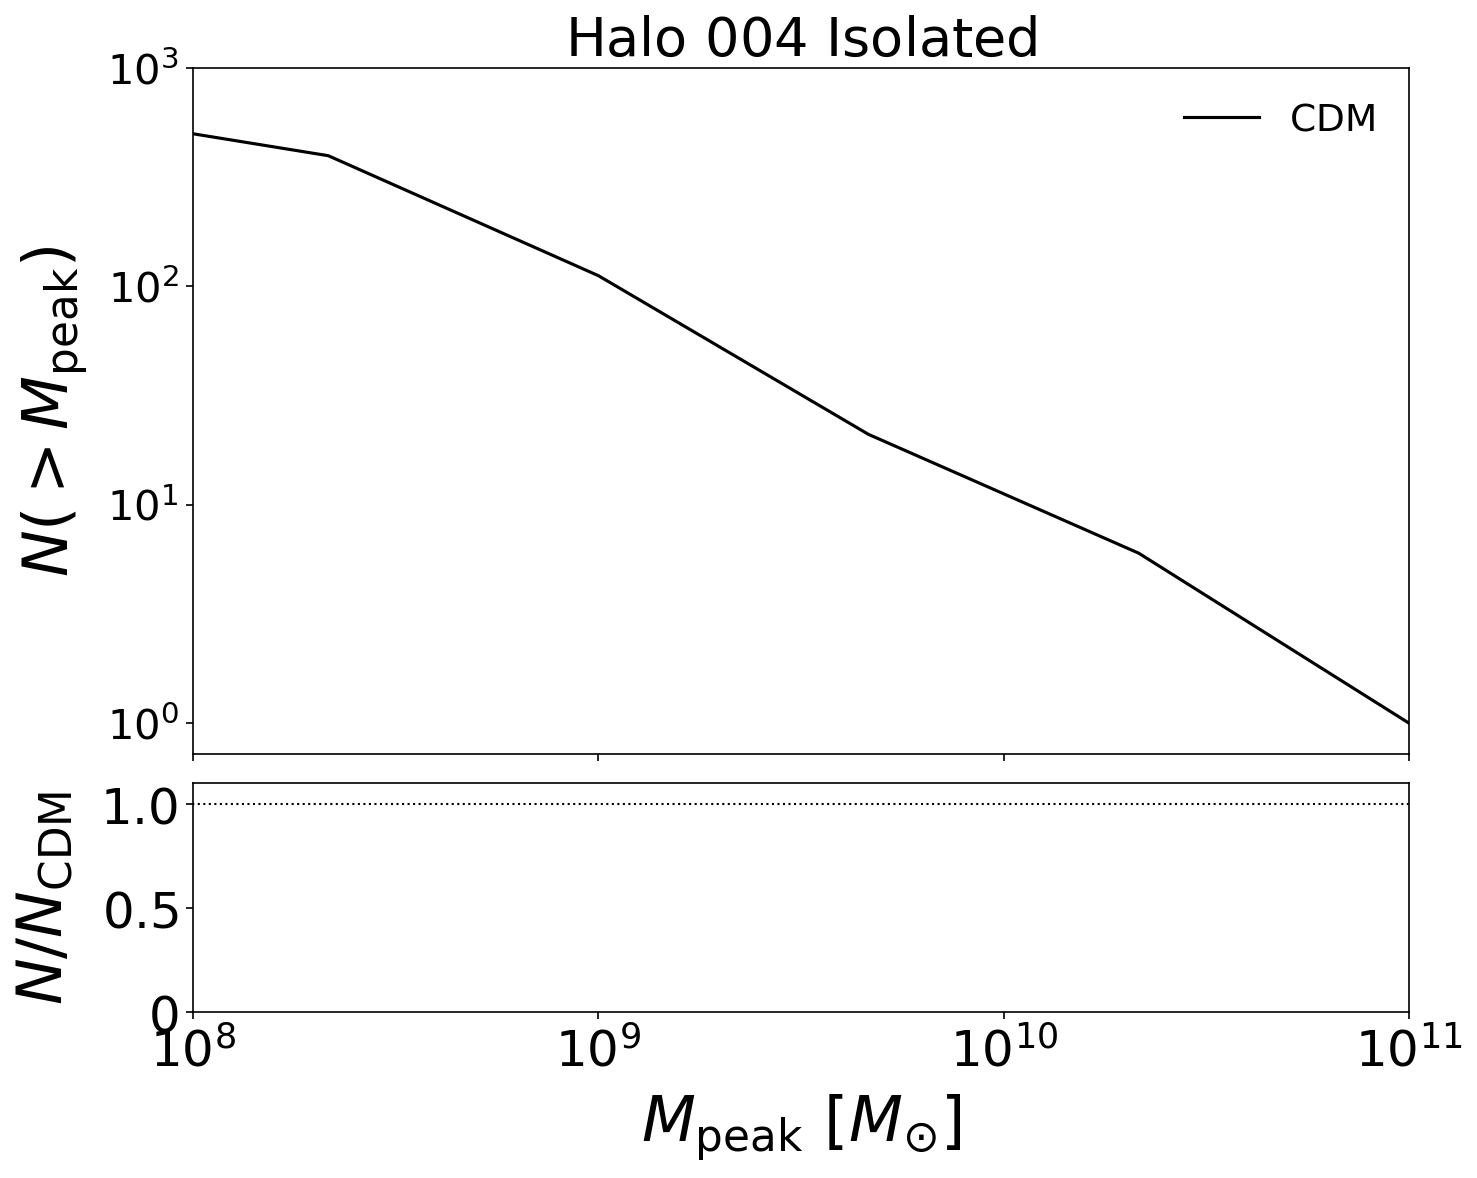

In [104]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

###

# getting distances of halos wrt the host halo/galaxy
distances = 1.*np.sqrt((halos['x']-host_main_branch['x'][0])**2+(halos['y']-host_main_branch['y'][0])**2+(halos['z']-host_main_branch['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_cdm = (distances < 3.) & (halos['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

CDM8K_values, CDM8K_base = np.histogram(np.log10(halos['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(halos['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')

###

#The bottom panel shows the ratio relative to CDM - which is just 1 when we only show CDM, but for other models

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

###

ax[0].set_title(r'$\mathrm{Halo\ 004\ Isolated}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

## Exercises

### 1. Explore the data

Experiment with the fields in `host_main_branch`, `subhalos`, and `halos` (note that `subhalos` and `halos` contain exactly the same fields). Try to understand what some of the fields mean, and see if they behave like you expect quantitatively. 

In [105]:
host_main_branch = sim_data['Halo004']['cdm'][0] # halo, model, host main branch
isolated_halo_pop = sim_data['Halo004']['cdm'][1]
subhalos = sim_data['Halo004']['cdm'][2]
isolated_halo_pop.dtype.fields

mappingproxy({'scale': (dtype('float32'), 0),
              'id': (dtype('int64'), 4),
              'desc_scale': (dtype('float32'), 12),
              'desc_id': (dtype('int64'), 16),
              'num_prog': (dtype('int64'), 24),
              'pid': (dtype('int64'), 32),
              'upid': (dtype('int64'), 40),
              'desc_pid': (dtype('int64'), 48),
              'phantom': (dtype('int64'), 56),
              'sam_Mvir': (dtype('float32'), 64),
              'Mvir': (dtype('float32'), 68),
              'Rvir': (dtype('float32'), 72),
              'rs': (dtype('float32'), 76),
              'vrms': (dtype('float32'), 80),
              'mmp?': (dtype('int64'), 84),
              'scale_of_last_MM': (dtype('float32'), 92),
              'vmax': (dtype('float32'), 96),
              'x': (dtype('float32'), 100),
              'y': (dtype('float32'), 104),
              'z': (dtype('float32'), 108),
              'vx': (dtype('float32'), 112),
              'vy': (dtype(

Text(0, 0.5, 'max circular velocity (km/s)')

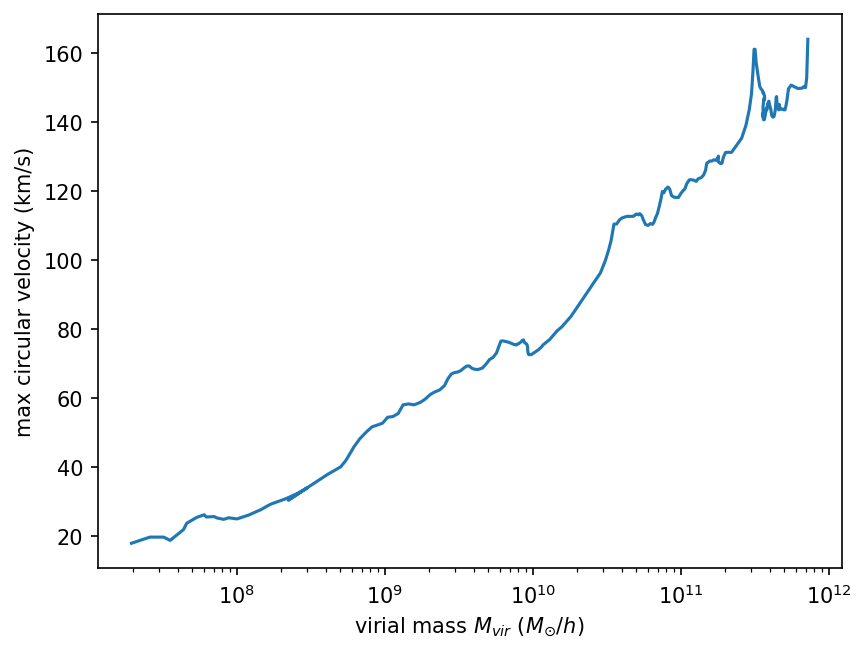

In [106]:
# the rotational velocity of the host halo as a function of mass?
# i.e. looking at velocity over accretion history
plt.semilogx(host_main_branch['mvir'], host_main_branch['vmax'])
plt.xlabel(r'virial mass $M_{vir}$ ($M_{\odot} / h$)')
plt.ylabel(r'max circular velocity (km/s)')

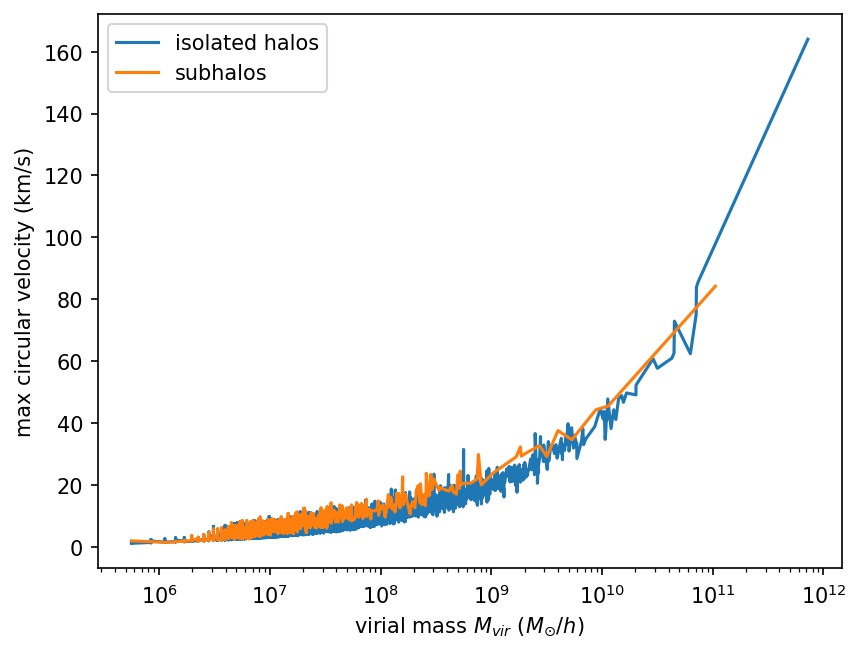

In [107]:
plt.semilogx(isolated_halo_pop['Mvir'], isolated_halo_pop['vmax'], label='isolated halos')
plt.semilogx(subhalos['Mvir'], subhalos['vmax'], label='subhalos')
plt.xlabel(r'virial mass $M_{vir}$ ($M_{\odot} / h$)')
plt.ylabel(r'max circular velocity (km/s)')
plt.legend()
# what are the significant differences between isolated halos and subhalos in the data? why is the isolated population larger?

### 2. Plot the subhalo mass function

Repeat the halo mass function plot above, but now for the *subhalo* mass function at $z=0$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


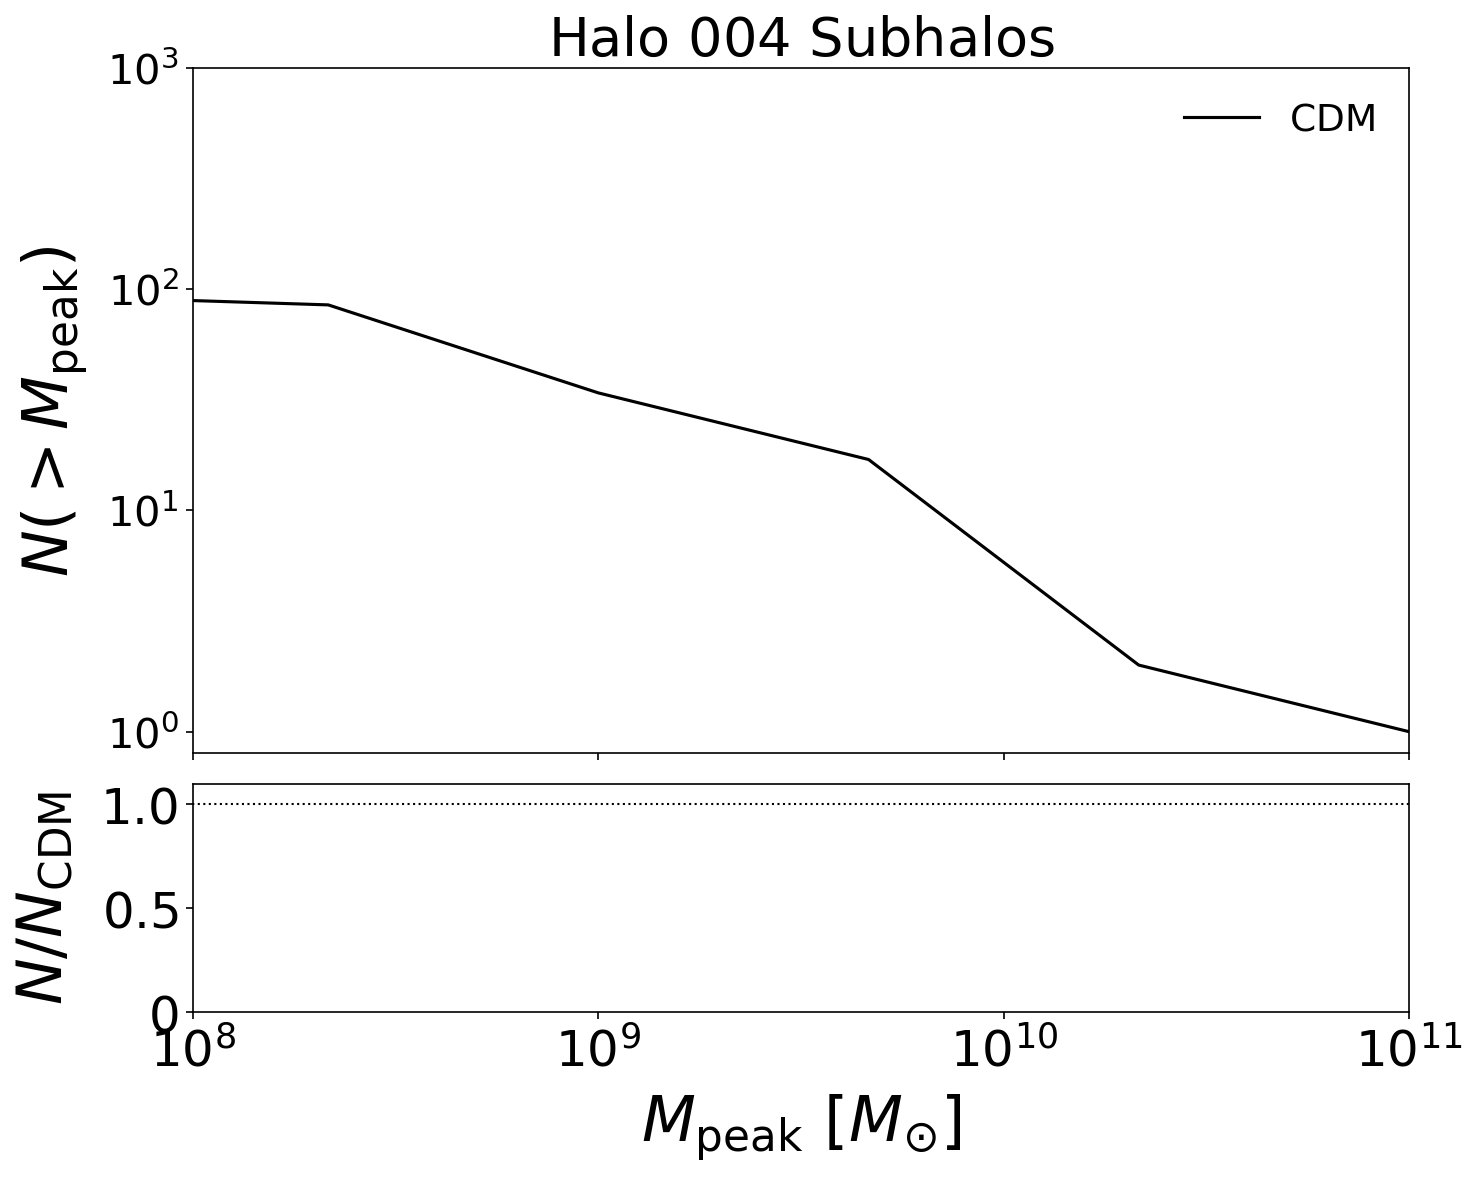

In [108]:
subhalos = sim_data['Halo004']['cdm'][2]
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

###

# getting distances of halos wrt the host halo/galaxy
distances = 1.*np.sqrt((subhalos['x']-host_main_branch['x'][0])**2+(subhalos['y']-host_main_branch['y'][0])**2+(subhalos['z']-host_main_branch['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_cdm = (distances < 3.) & (subhalos['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

CDM8K_values, CDM8K_base = np.histogram(np.log10(subhalos['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(subhalos['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')

###

#The bottom panel shows the ratio relative to CDM - which is just 1 when we only show CDM, but for other models

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

###

ax[0].set_title(r'$\mathrm{Halo\ 004\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

### 3. Plot warm dark matter results

Repeat the host halo history, subhalo visualization, and mass function exercises for the `wdm_3` model; for the halo and subhalo mass functions, include both the warm and cold dark matter results on the same plot. Write down interpretations of any differences you see.

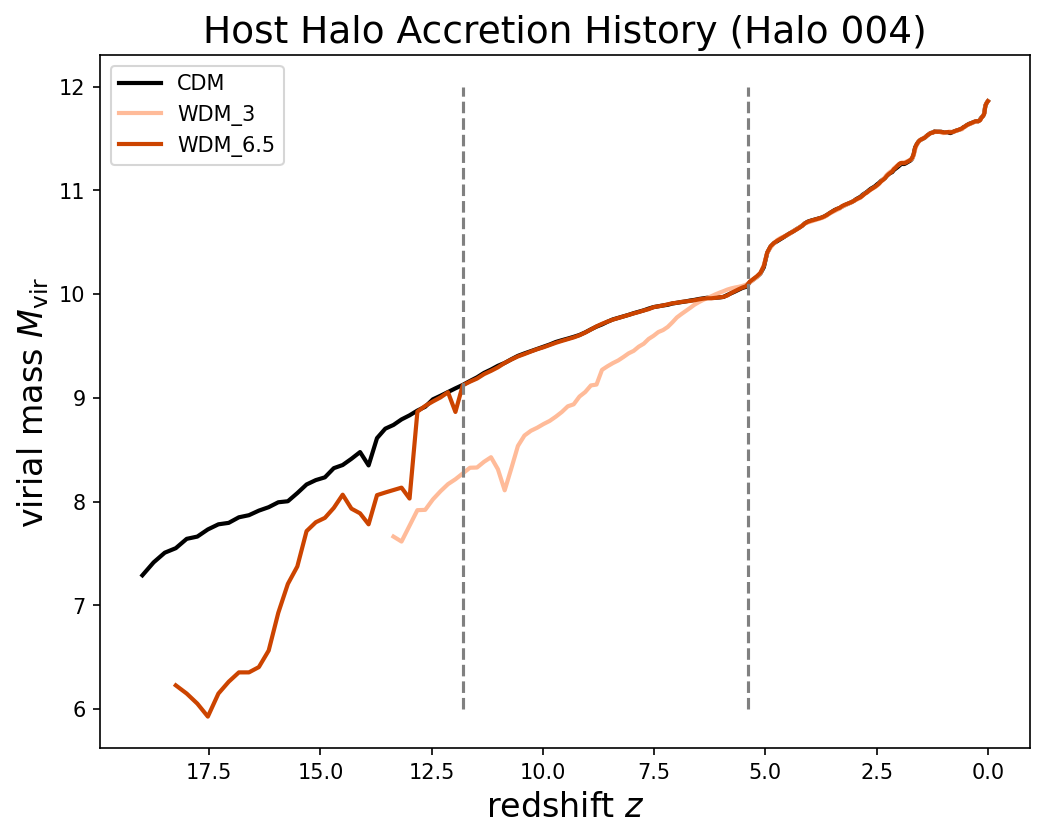

In [124]:
'''
TODO: start here on Wednesday
'''

# cold dark matter
hmb_cdm = sim_data['Halo004']['cdm'][0] # halo, model, host main branch
ihp_cdm = sim_data['Halo004']['cdm'][1]
sh_cdm = sim_data['Halo004']['cdm'][2]

# warm dark matter
hmb_wdm = sim_data['Halo004']['wdm_3'][0] # halo, model, host main branch
ihp_wdm = sim_data['Halo004']['wdm_3'][1]
sh_wdm = sim_data['Halo004']['wdm_3'][2]

# warm dark matter, 6.5
hmb_wdm6 = sim_data['Halo004']['wdm_6.5'][0] # halo, model, host main branch
ihp_wdm6 = sim_data['Halo004']['wdm_6.5'][1]
sh_wdm6 = sim_data['Halo004']['wdm_6.5'][2]

plt.figure(figsize=(8,6))

redshift_cdm = 1./hmb_cdm['scale'] - 1.
mass_accretion_history_cdm = np.log10(hmb_cdm['mvir']) # virial mass

redshift_wdm = 1./hmb_wdm['scale'] - 1.
mass_accretion_history_wdm = np.log10(hmb_wdm['mvir']) # virial mass

redshift_wdm6 = 1./hmb_wdm6['scale'] - 1.
mass_accretion_history_wdm6 = np.log10(hmb_wdm6['mvir']) # virial mass

plt.plot(redshift_cdm,mass_accretion_history_cdm,lw=2,c=sim_colors['cdm'], label='CDM') 
plt.plot(redshift_wdm,mass_accretion_history_wdm,lw=2,c=sim_colors['wdm_3'], label='WDM_3') 
plt.plot(redshift_wdm6,mass_accretion_history_wdm6,lw=2,c=sim_colors['wdm_6.5'], label='WDM_6.5') 
plt.vlines([5.4, 11.8], ymin=6, ymax=12, color='gray', linestyles='dashed')

plt.xlabel(r'$\mathrm{redshift\ } z$',fontsize=16)
plt.ylabel(r'$\mathrm{virial\ mass\ } M_{\mathrm{vir}}$',fontsize=16)
plt.title('Host Halo Accretion History (Halo 004)', fontsize=18)
plt.legend()

plt.gca().invert_xaxis()
plt.show()

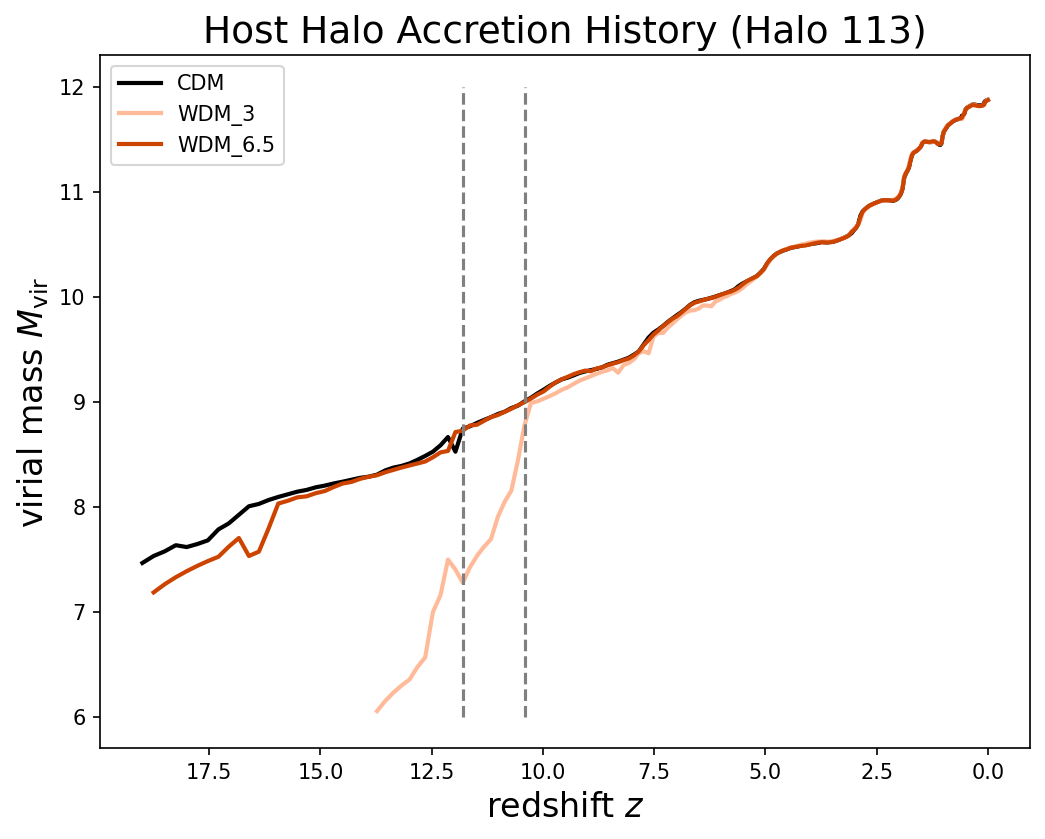

In [126]:
# cold dark matter
hmb_cdm = sim_data['Halo113']['cdm'][0] # halo, model, host main branch
ihp_cdm = sim_data['Halo113']['cdm'][1]
sh_cdm = sim_data['Halo113']['cdm'][2]

# warm dark matter
hmb_wdm = sim_data['Halo113']['wdm_3'][0] # halo, model, host main branch
ihp_wdm = sim_data['Halo113']['wdm_3'][1]
sh_wdm = sim_data['Halo113']['wdm_3'][2]

# warm dark matter, 6.5
hmb_wdm6 = sim_data['Halo113']['wdm_6.5'][0] # halo, model, host main branch
ihp_wdm6 = sim_data['Halo113']['wdm_6.5'][1]
sh_wdm6 = sim_data['Halo113']['wdm_6.5'][2]

plt.figure(figsize=(8,6))

redshift_cdm = 1./hmb_cdm['scale'] - 1.
mass_accretion_history_cdm = np.log10(hmb_cdm['mvir']) # virial mass

redshift_wdm = 1./hmb_wdm['scale'] - 1.
mass_accretion_history_wdm = np.log10(hmb_wdm['mvir']) # virial mass

redshift_wdm6 = 1./hmb_wdm6['scale'] - 1.
mass_accretion_history_wdm6 = np.log10(hmb_wdm6['mvir']) # virial mass

plt.plot(redshift_cdm,mass_accretion_history_cdm,lw=2,c=sim_colors['cdm'], label='CDM') 
plt.plot(redshift_wdm,mass_accretion_history_wdm,lw=2,c=sim_colors['wdm_3'], label='WDM_3') 
plt.plot(redshift_wdm6,mass_accretion_history_wdm6,lw=2,c=sim_colors['wdm_6.5'], label='WDM_6.5') 
plt.vlines([10.4, 11.8], ymin=6, ymax=12, color='gray', linestyles='dashed')

plt.xlabel(r'$\mathrm{redshift\ } z$',fontsize=16)
plt.ylabel(r'$\mathrm{virial\ mass\ } M_{\mathrm{vir}}$',fontsize=16)
plt.title('Host Halo Accretion History (Halo 113)', fontsize=18)
plt.legend()

plt.gca().invert_xaxis()
plt.show()

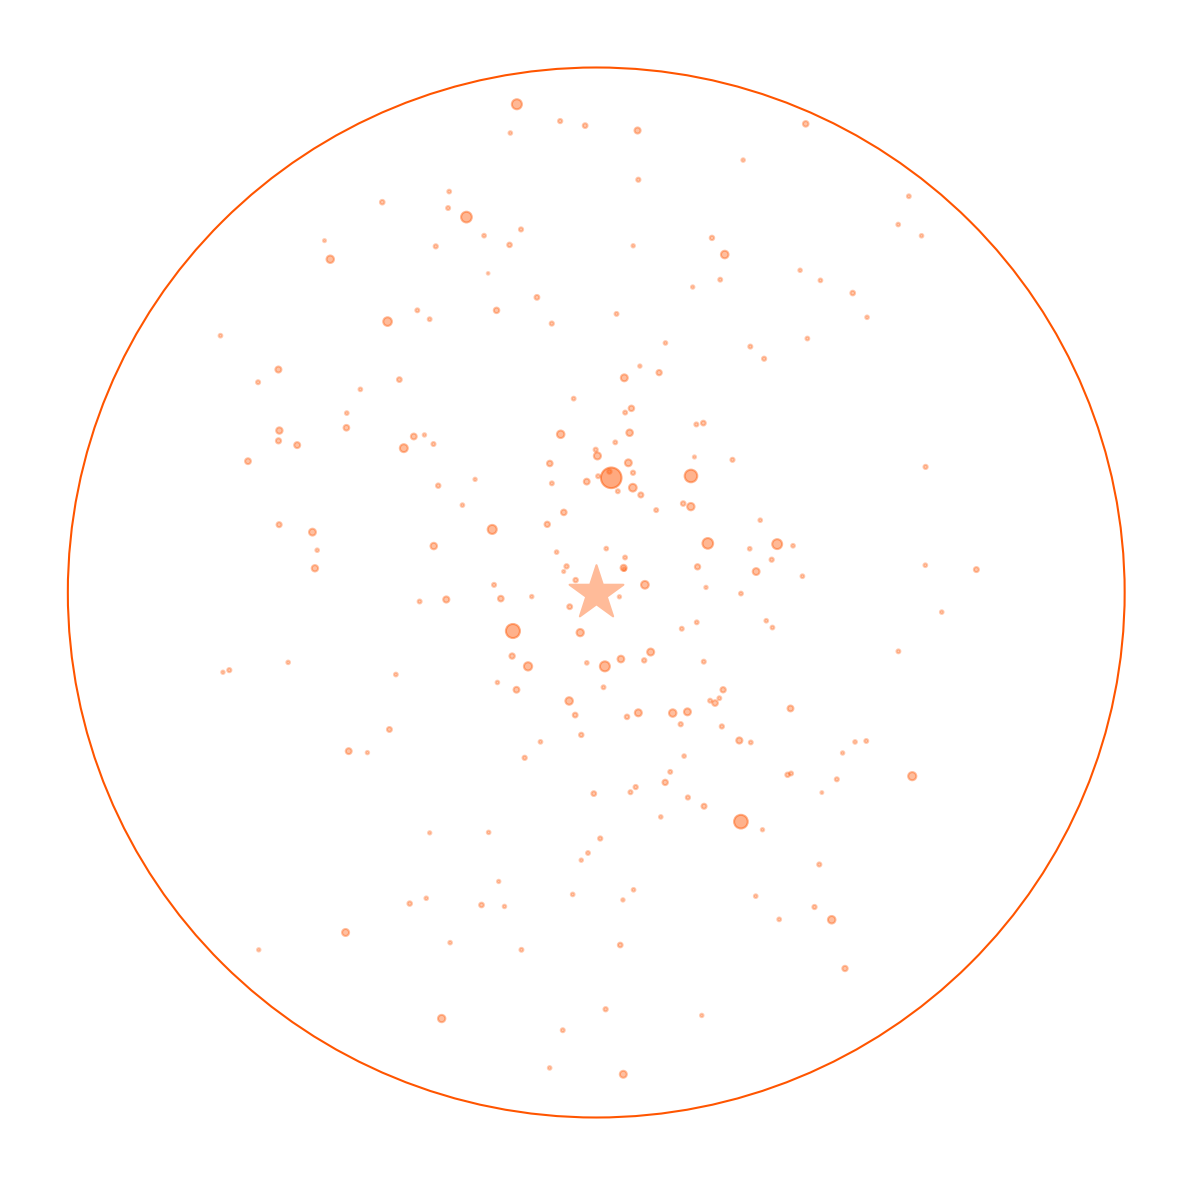

In [110]:
plt.figure(figsize=(10,10))

# plt.scatter(hmb_cdm['x'][0],hmb_cdm['y'][0],s=4*hmb_cdm['rvir'][0],marker='*',zorder=999,
#            c=sim_colors['cdm'])
# circle = plt.Circle((hmb_cdm['x'][0],hmb_cdm['y'][0]), hmb_cdm['rvir'][0]/1000.,
#                    facecolor='none',edgecolor=sim_colors['cdm'])#, color='blue')
# plt.gca().add_patch(circle)

# plt.scatter(sh_cdm['x'],sh_cdm['y'],s=sh_cdm['Rvir'],
#             alpha=0.5*np.log10(sh_cdm['Mvir'])/np.max(np.log10(sh_cdm['Mvir'])),c=sim_colors['cdm'],zorder=998)

plt.scatter(hmb_wdm['x'][0],hmb_wdm['y'][0],s=4*hmb_wdm['rvir'][0],marker='*',zorder=999,
           c=sim_colors['wdm_3'])
circle = plt.Circle((hmb_wdm['x'][0],hmb_wdm['y'][0]), hmb_wdm['rvir'][0]/1000.,
                   facecolor='none',edgecolor=sim_colors['wdm_6'])
plt.gca().add_patch(circle)

plt.scatter(sh_wdm['x'],sh_wdm['y'],s=sh_wdm['Rvir'],
            alpha=0.5*np.log10(sh_wdm['Mvir'])/np.max(np.log10(sh_wdm['Mvir'])),c=sim_colors['wdm_6'],zorder=998)

plt.axis('off')
plt.show()

/var/folders/s9/8pp6tr_s0nbdqk8gs605_nzc0000gr/T/ipykernel_27226/3666051753.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(WDM8K_base[1:], len(ihp_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative, 'k-',label='$\mathrm{WDM_3}$', color=sim_colors['wdm_3'])
/var/folders/s9/8pp6tr_s0nbdqk8gs605_nzc0000gr/T/ipykernel_27226/3666051753.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(CDM8K_base[1:], (len(ihp_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative)/(len(ihp_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 'k:', lw=1, zorder=999, color=sim_colors['wdm_6'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


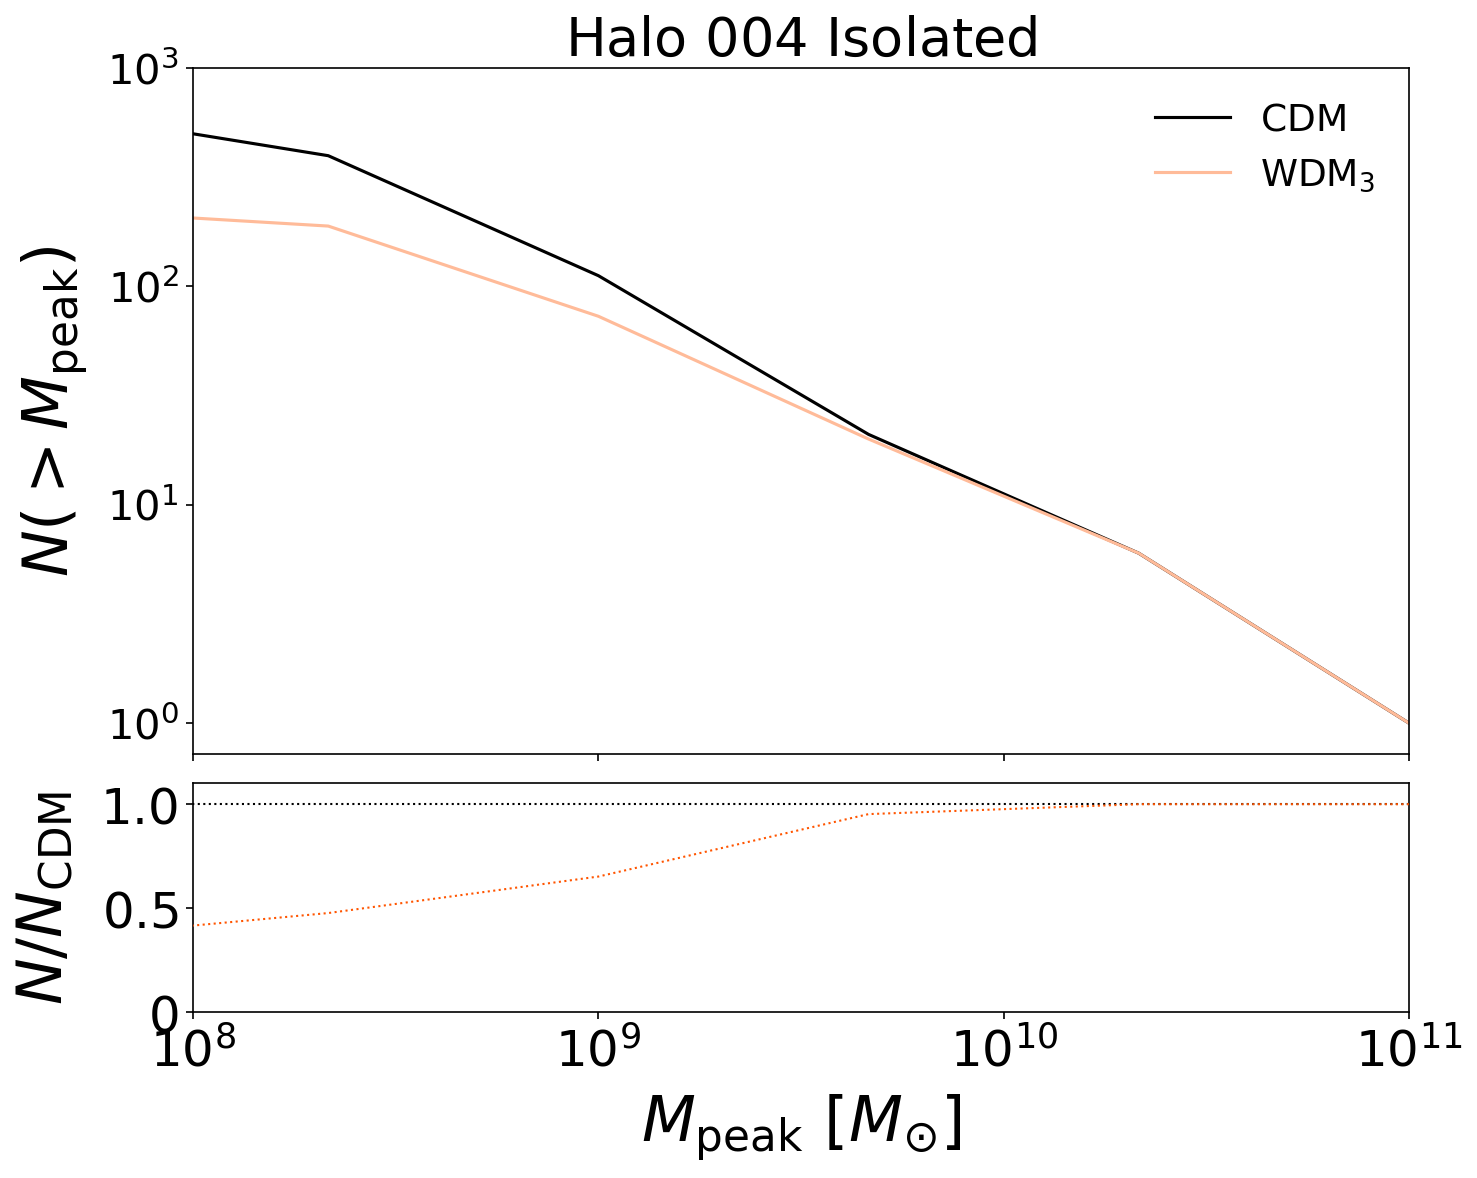

In [117]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

###

# getting distances of halos wrt the host halo/galaxy
distances_cdm = 1.*np.sqrt((ihp_cdm['x']-hmb_cdm['x'][0])**2+(ihp_cdm['y']-hmb_cdm['y'][0])**2+(ihp_cdm['z']-hmb_cdm['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_cdm = (distances_cdm < 3.) & (ihp_cdm['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

CDM8K_values, CDM8K_base = np.histogram(np.log10(ihp_cdm['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(ihp_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

### and now with WDM

# getting distances of halos wrt the host halo/galaxy
distances_wdm = 1.*np.sqrt((ihp_wdm['x']-hmb_wdm['x'][0])**2+(ihp_wdm['y']-hmb_wdm['y'][0])**2+(ihp_wdm['z']-hmb_wdm['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_wdm = (distances_wdm < 3.) & (ihp_wdm['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

WDM8K_values, WDM8K_base = np.histogram(np.log10(ihp_wdm['Mpeak'][dist_ind_wdm]/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

ax[0].plot(WDM8K_base[1:], len(ihp_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative, 'k-',label='$\mathrm{WDM_3}$', color=sim_colors['wdm_3'])

### TODO: FIX THIS RATIO
ax[1].plot(CDM8K_base[1:], (len(ihp_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative)/(len(ihp_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 'k:', lw=1, zorder=999, color=sim_colors['wdm_6'])

###

ax[0].set_title(r'$\mathrm{Halo\ 004\ Isolated}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

/var/folders/s9/8pp6tr_s0nbdqk8gs605_nzc0000gr/T/ipykernel_27226/915293993.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(WDM8K_base[1:], len(sh_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative, 'k-',label='$\mathrm{WDM_3}$', color=sim_colors['wdm_3'])
/var/folders/s9/8pp6tr_s0nbdqk8gs605_nzc0000gr/T/ipykernel_27226/915293993.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(CDM8K_base[1:], (len(sh_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative)/(len(sh_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 'k:', lw=1, zorder=999, color=sim_colors['wdm_6'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


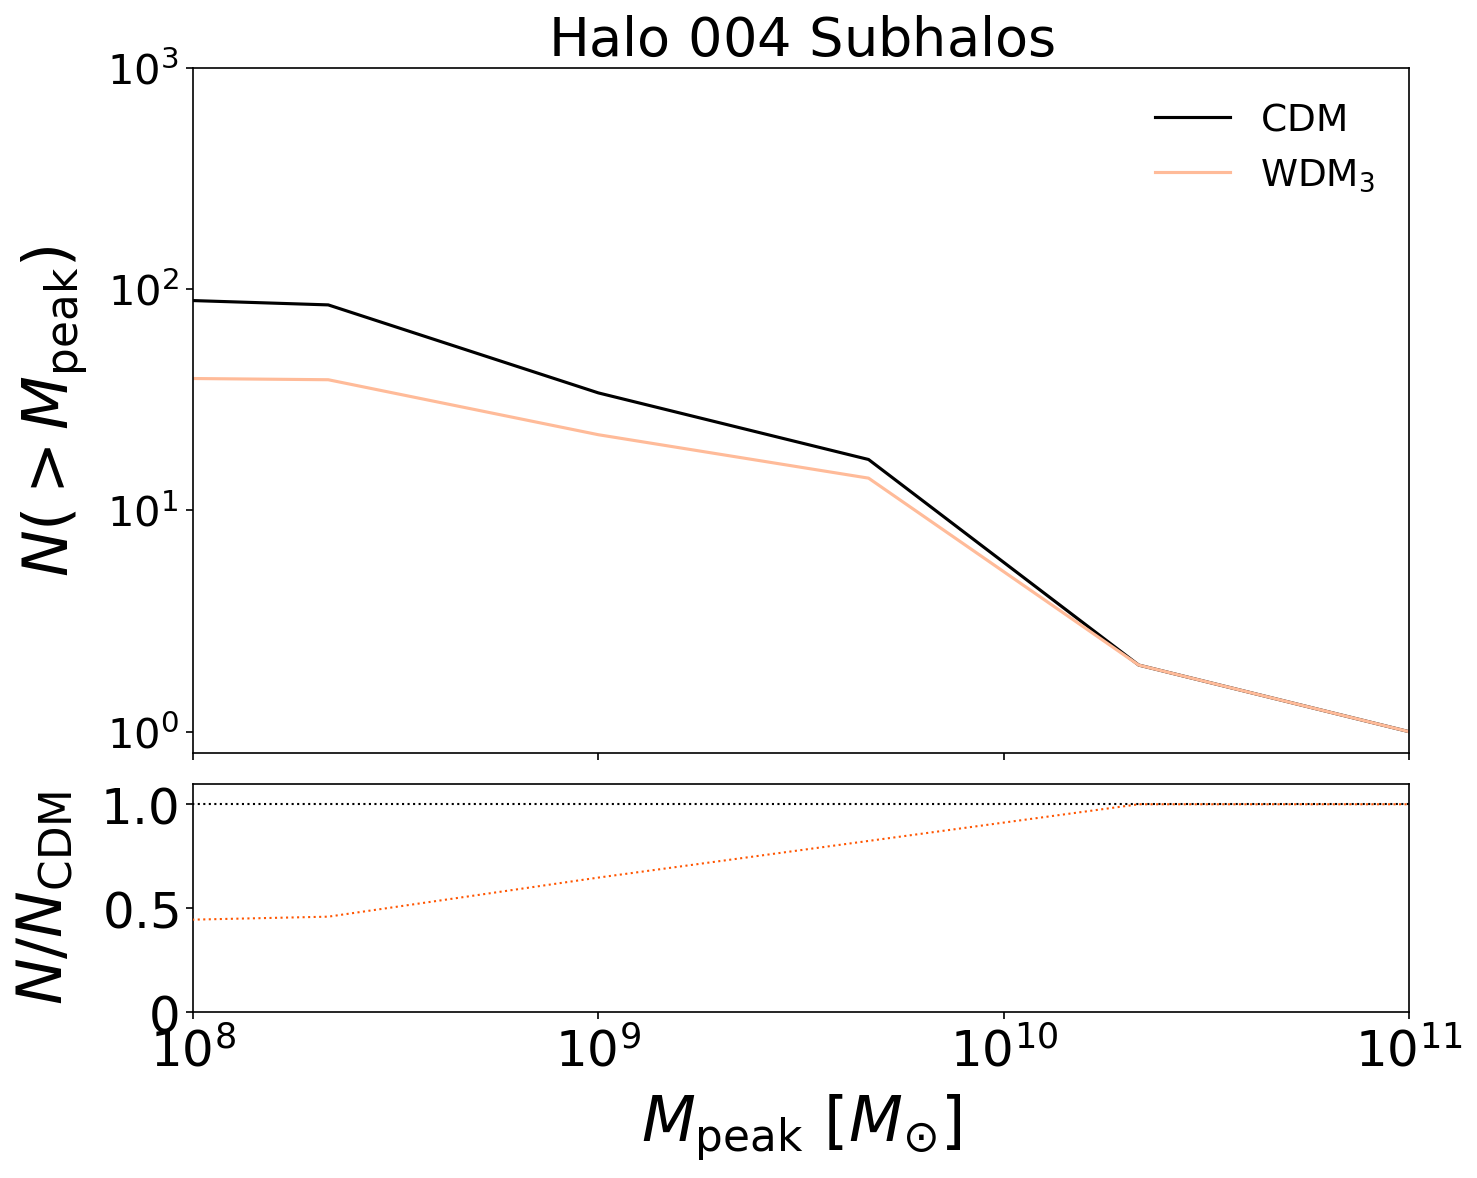

In [118]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

###

# getting distances of halos wrt the host halo/galaxy
distances_cdm = 1.*np.sqrt((sh_cdm['x']-hmb_cdm['x'][0])**2+(sh_cdm['y']-hmb_cdm['y'][0])**2+(sh_cdm['z']-hmb_cdm['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_cdm = (distances_cdm < 3.) & (sh_cdm['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

CDM8K_values, CDM8K_base = np.histogram(np.log10(sh_cdm['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(sh_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

### and now with WDM

# getting distances of halos wrt the host halo/galaxy
distances_wdm = 1.*np.sqrt((sh_wdm['x']-hmb_wdm['x'][0])**2+(sh_wdm['y']-hmb_wdm['y'][0])**2+(sh_wdm['z']-hmb_wdm['z'][0])**2)/0.7
# setting the 3 Mpc limit and mass limit (for resolution)
dist_ind_wdm = (distances_wdm < 3.) & (sh_wdm['Mvir']/0.7 > 1.2e8) # this only returns an array of boolean values at the proper indices

WDM8K_values, WDM8K_base = np.histogram(np.log10(sh_wdm['Mpeak'][dist_ind_wdm]/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

ax[0].plot(WDM8K_base[1:], len(sh_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative, 'k-',label='$\mathrm{WDM_3}$', color=sim_colors['wdm_3'])

### TODO: FIX THIS RATIO
ax[1].plot(CDM8K_base[1:], (len(sh_wdm['Mpeak'][dist_ind_wdm])-WDM8K_cumulative)/(len(sh_cdm['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 'k:', lw=1, zorder=999, color=sim_colors['wdm_6'])

###

ax[0].set_title(r'$\mathrm{Halo\ 004\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()